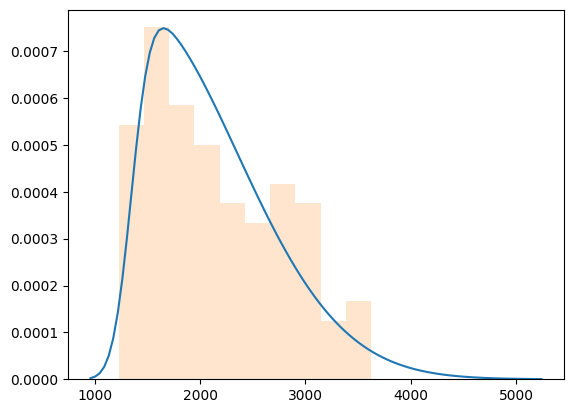

[3151.28223427 2316.6051781  2317.83914465 1234.01045017 1877.53714671
 2308.86143334 2615.86127737 2982.82059571 1839.61526351 3405.86946863
 2085.58997806 2023.95854643 2928.48893011 2222.16175969 1450.84740913
 2133.57869558 1912.75405634 1349.69535004 3003.14343456 3203.03387111
 2882.27803075 2770.59592238 3052.44152946 1492.94526251 2819.15935737
 2592.37711448 1407.67584738 1409.52959521 2024.50851199 1751.01547562
 2780.6416809  2805.86609777 1552.84387088 1628.45983373 3013.63509016
 1567.70003237 2018.38551148 2403.39696358 3462.49128816 1695.62739572
 1757.41562073 1534.02980573 1304.74381595 2275.20163512 1419.47795081
 1514.3303538  1836.37930369 1567.0423861  2523.85151981 1594.87391078
 1532.93498314 2708.9089141  1547.27127191 2883.573027   1684.22743802
 3035.64368974 1598.27047918 1748.52669509 1703.23411673 1413.01355144
 1990.16256899 2831.0736724  2395.43493014 2744.38923413 2570.42149866
 1227.41428056 1422.4438812  1671.35503717 1723.98966663 1739.33918907
 1986.

In [48]:
from scipy.stats import skewnorm, norm
import matplotlib.pyplot as plt
import numpy as np

a = 7 
loc = 1350
scale = 1000
size = 100
fig, ax = plt.subplots(1, 1)
income = skewnorm.rvs(a, loc=loc, scale=scale, size=size)
x = np.linspace(skewnorm.ppf(0.0001, a, loc=loc, scale=scale),
                skewnorm.ppf(0.9999, a, loc=loc, scale=scale), size)

ax.plot(x, skewnorm.pdf(x, a, loc=loc, scale=scale))
ax.hist(income, density=True, histtype='stepfilled', alpha=0.2)
plt.show()
print(income)

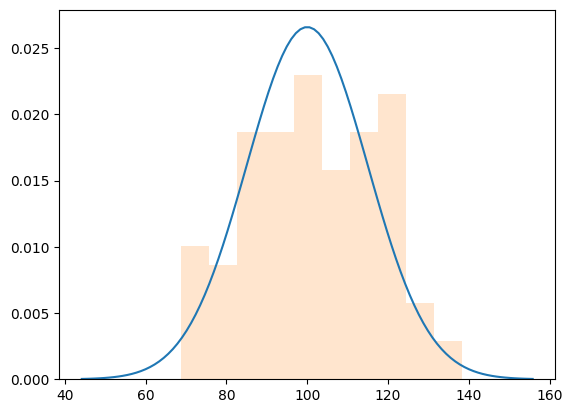

[ 83.62515453 104.68939452  82.13155271  92.55680762 129.27093027
 118.60127721  77.91365795  87.70840114  69.41194861  74.57463177
 112.36580568 107.03685525  91.91158031 110.79292533  81.50765632
  94.27460105 116.28131791  88.29545015 131.63742203 102.66140752
  84.54193871 121.52530948 128.70582258 123.35842765  98.79537323
  75.93104    109.50586089  98.17374013 110.21074874  90.06787462
  98.24007953 120.56807284 115.07416713  97.02498713  93.9148213
  72.30381106  85.59172087 117.49644622  79.28641182  99.23827614
 126.80899878 112.76133844  85.91800101  93.25366438  79.35653579
 119.02200475  94.96207002  86.9968887  110.47112657 121.01081826
 102.9142124   86.92328223  87.20973622  99.24250287 110.63973142
 106.37403738 122.76046754  86.32657759  95.94545883 120.55089555
 104.9242722   86.37793375  82.95337657 100.43824357  96.04233116
 118.79034918 124.03552871  87.50904833 106.41903376 113.51482057
 117.86266377  69.15148432  89.76555115  71.49178567  91.52832155
  99.221501

In [51]:
loc=100
scale=15
size=100
iq = norm.rvs(loc=loc, scale=scale, size=size)
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.0001, loc=loc, scale=scale),
                norm.ppf(0.9999, loc=loc, scale=scale), size)
ax.plot(x, norm.pdf(x, loc=loc, scale=scale))
ax.hist(iq, density=True, histtype='stepfilled', alpha=0.2)
plt.show()
print(iq)

In [58]:
import pandas as pd

pd.set_option("display.max_rows", None)
def make_df():
    data = {'income': income, 'iq': iq}
    frame = pd.DataFrame(data)
    return frame
    
def create_outliers():
    frame = make_df() 
    # Outliers IQ
    for i in range(5):
        rand_indx = np.random.randint(0, 100)
        frame.iloc[rand_indx]["iq"] = np.random.randint(10, 20)
    for i in range(5):
        rand_indx = np.random.randint(0, 100)
        frame.iloc[rand_indx]["income"] = np.random.randint(30000, 40000)
    return frame



data = create_outliers()
data.to_csv("outliers.csv")


# Simple Test for IQ

In [1]:
import pandas as pd

dataset = pd.read_csv("outliers.csv")
# ... actually look into at least the headers
mean = dataset["iq"].mean()
std = dataset["iq"].std()
print("Mean: ", mean)
print("Std: ", std)

Mean:  96.9552199693351
Std:  24.77777872027345


In [12]:
def find_outliers_iq(dataset, mean, std):
    # calculate z score for each value
    z_scores = [(i, (x-mean)/std) for i, x in enumerate(dataset["iq"])]
    threshold_low = -2 # 2 std below mean
    threshold_high = 2 # 2 std above mean
    # find actual outliers
    outliers = [i for i, x in z_scores if x < threshold_low or x > threshold_high]
    print("Outliers: ", dataset.iloc[outliers])

find_outliers_iq(dataset, mean, std)

Outliers:      Unnamed: 0       income    iq
6            6  2615.861277  12.0
17          17  1349.695350  19.0
56          56  1598.270479  13.0
81          81  2473.604130  18.0
83          83  3431.057491  11.0


In [41]:
import matplotlib.pyplot as plt
import numpy as np
def create_histogram(dataset):
    # u may even display the histogram using dataset.hist(column="income", bins=10)
    bins = np.histogram(dataset["income"], bins=10)
    return bins

def find_outliers_income(dataset, bins, critical_fequency):
    bin_edges = bins[1]
    bin_values = bins[0]
    for i,b in enumerate(bin_values):
        if b <= critical_fequency:
            values = dataset.loc[(dataset["income"] >= bin_edges[i]) & (dataset["income"] <= bin_edges[i+1])]
            if not values.empty:
                print("Outliers fomr bin ", i, "\n", values)


bins = create_histogram(dataset)
find_outliers_income(dataset, bins, 5)

Outliers fomr bin  8 
     Unnamed: 0   income          iq
44          44  32303.0   79.356536
63          63  32650.0  100.438244
Outliers fomr bin  9 
     Unnamed: 0   income          iq
40          40  36725.0  126.808999
85          85  38763.0  120.771019
96          96  35061.0  119.839680
